<a href="https://colab.research.google.com/github/engogola/Fruits-and-vegatables-classification-ML-lab/blob/main/fruits_and_vegies_classification_lab_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this note book we are to build a Machine learning model to predict between
fruits and vegetables using tensoflow.The members of the lab group are

1.   Richard ogola E021-01-2250/2020
2.   Michael Mwaura E021-01-0939/2020

1.   Mercy Bore E021-01-0993/2020
2.   Mercy Edwin E021-01-2375/2020


5.   Peter maina E021-01-0942/2020




The following is a step by step guide on how we are going to achieve our experiment.



1.   Importing libraries;The code starts by importing necesaary libraries in python as well as the starndadrd libraries.

1. Dataset paths;Specify the main path to the fruit dataset  i.e training_folder and test_folder
1.   Data augmentation and normalization.
Data preprocessing ;define constants for batch size,image size and epochs.
6.   Model Architecture
8.  Training the model
9.  Evaluating the model's perfomance

2.   Visualizing the model's perfomance
2. saving the model

2.   Prediction on random test images.

The data to this training were obtained in Nyeri town Market and some on Naivas Supermarket nyeri branch.

**Part One**
 We import libraries to be used in our project.

In [ ]:

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from os import mkdir
from google.colab import drive
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import backend as K


**part two**
defining path directories

In [ ]:

#mounting drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/fruits classifier/imagesets ML'
train_dir = '/content/drive/MyDrive/fruits classifier/imagesets ML/j/train_sets'
test_dir = '/content/drive/MyDrive/fruits classifier/imagesets ML/j/test_sets'

Mounted at /content/drive


**part three** Data augmentation and normalization

Data augmentation is a technique used to artificially increase the diversity of your training dataset without actually collecting new data. It involves applying random transformations to the existing images in your dataset.
Data augmentation is a technique used to artificially increase the diversity of your training dataset without actually collecting new data. It involves applying random transformations to the existing images in your dataset.

In [ ]:

#Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=8,
        class_mode='sparse')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='sparse')
test_classes = len(test_generator.class_indices)
train_classes = len(train_generator.class_indices)
print(test_classes)
print(train_classes)

Found 83 images belonging to 29 classes.
Found 33 images belonging to 29 classes.
29
29


**part four** Model architecture

In [ ]:
import json
class_indices = train_generator.class_indices
print(class_indices)
with open('/content/drive/MyDrive/fruits classifier/class_indices.json', 'w') as f:
    json.dump(class_indices, f)

{'Apples': 0, 'Beetroot': 1, 'Cabbage': 2, 'Cauliflower': 3, 'Chilli': 4, 'Corriander': 5, 'Cucumber': 6, 'Egg plant': 7, 'Garlic': 8, 'Ginger': 9, 'Grapes': 10, 'Kiwii': 11, 'Lettuce': 12, 'Onions': 13, 'Paprikka': 14, 'Pawpaw': 15, 'Pomegranate': 16, 'Tomatoes': 17, 'Turnip': 18, 'couggette': 19, 'lemon': 20, 'mangoes': 21, 'oranges': 22, 'pears': 23, 'peas': 24, 'pineapples': 25, 'soy beans': 26, 'spinach': 27, 'watermelon': 28}


In [ ]:


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]),
    layers.MaxPool2D(pool_size=2, strides=2),

    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2),

    layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2),

    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=29, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#print model summary
cnn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

**part five** Model training

In [ ]:
#model training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = cnn.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
11/11 [==============================] - 52s 5s/step - loss: 3.4204 - accuracy: 0.0361 - val_loss: 3.3724 - val_accuracy: 0.0303


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
11/11 [==============================] - 9s 839ms/step - loss: 3.3601 - accuracy: 0.0482 - val_loss: 3.3467 - val_accuracy: 0.0303
Epoch 3/50
11/11 [==============================] - 8s 643ms/step - loss: 3.3417 - accuracy: 0.0482 - val_loss: 3.3307 - val_accuracy: 0.0303
Epoch 4/50
11/11 [==============================] - 10s 869ms/step - loss: 3.3086 - accuracy: 0.0602 - val_loss: 3.3015 - val_accuracy: 0.0606
Epoch 5/50
11/11 [==============================] - 7s 640ms/step - loss: 3.2773 - accuracy: 0.0843 - val_loss: 3.2605 - val_accuracy: 0.1515
Epoch 6/50
11/11 [==============================] - 10s 928ms/step - loss: 3.2131 - accuracy: 0.1205 - val_loss: 3.2056 - val_accuracy: 0.2424
Epoch 7/50
11/11 [==============================] - 8s 713ms/step - loss: 3.1471 - accuracy: 0.1566 - val_loss: 3.1327 - val_accuracy: 0.1212
Epoch 8/50
11/11 [==============================] - 7s 632ms/step - loss: 3.0691 - accuracy: 0.1566 - val_loss: 3.0359 - val_accuracy: 0.1212
Epoc

**part six** Evaluating model's performance using test data.

In [ ]:
#evaluating model performance
# Evaluate model on validation set
loss, accuracy = cnn.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')


3/3 [==============================] - 1s 202ms/step - loss: 0.1083 - accuracy: 0.9697
Validation Loss: 0.1083, Validation Accuracy: 0.9697


Evaluating using confusion matrix

A confusion matrix will help to understand how well your model is performing for each class. It shows the true positives, true negatives, false positives, and false negatives for each class.

3/3 [==============================] - 1s 203ms/step


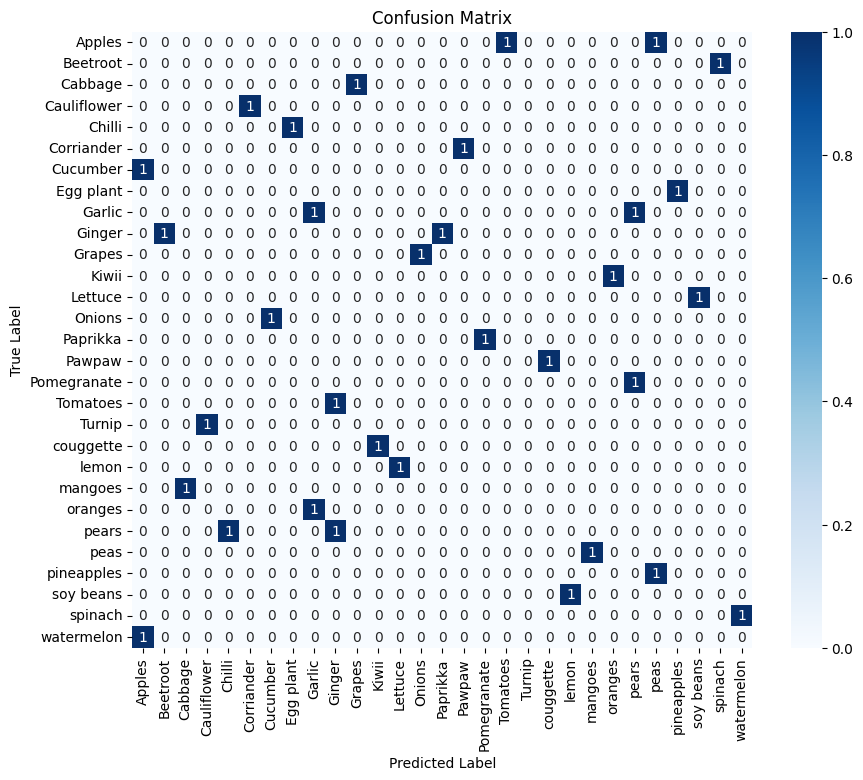

In [ ]:


# Generate predictions
y_pred = cnn.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Calculating precision, recall, and F1-score for a more comprehensive evaluation.

In [ ]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Precision: 0.0303
Recall: 0.0303
F1 Score: 0.0303
Accuracy: 0.0303


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**part seven** Visualizing the model's perfomance


Plotting the training and validation accuracy/loss over epochs will help you see if the model is learning and if there are any signs of overfitting or underfitting.

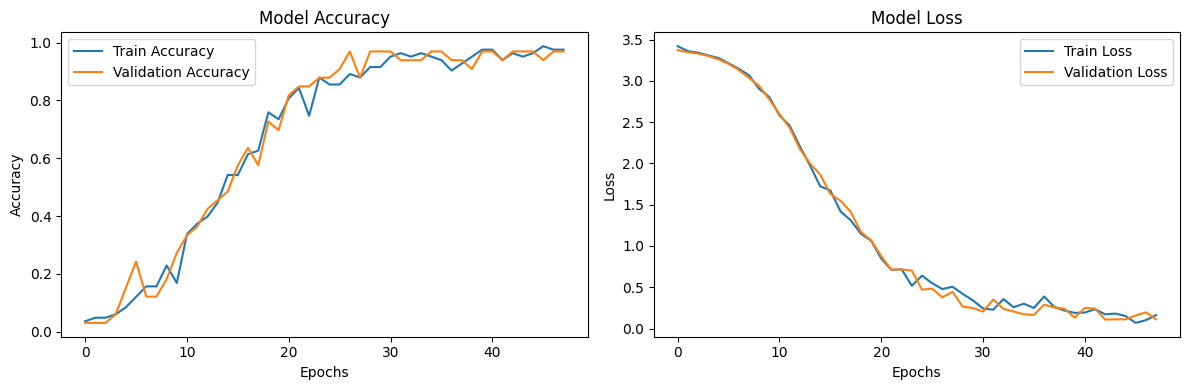

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**part eight** Saving the model

In [ ]:
cnn.save('/content/drive/MyDrive/fruits classifier/fruits_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**part nine** Testing model with random images
Testing Model with a single image

Image path: /content/drive/MyDrive/fruits classifier/imagesets ML/j/test_sets/Garlic/garlic.jpg.jpg


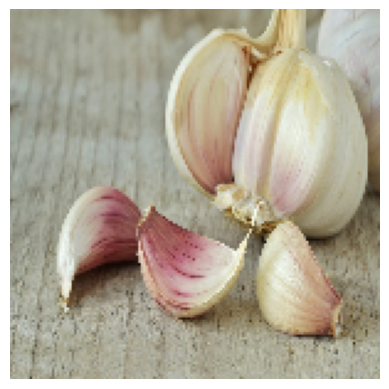

1/1 [==============================] - 0s 116ms/step
Raw prediction output: [[7.8445810e-05 2.5138378e-04 2.8472234e-04 7.8634009e-02 4.4288986e-06
  1.6408727e-04 7.7164350e-06 1.9558389e-03 8.8404560e-01 2.5919171e-02
  4.9591596e-05 4.1342943e-04 1.1170394e-08 6.1127316e-04 4.5397788e-05
  3.3975114e-09 1.6174140e-06 7.7356721e-10 3.9748470e-03 1.3636329e-04
  4.2467198e-07 2.7233375e-06 1.6741477e-13 2.2192747e-08 6.4526779e-05
  3.3456821e-03 1.5424254e-07 2.3398357e-08 8.5834499e-06]]
The model predicts: Garlic


In [ ]:


# Load the trained model (ensure this happens every run)
K.clear_session()
cnn = load_model('/content/drive/MyDrive/fruits classifier/fruits_classifier.h5')
# Assuming you have the test_generator already created
class_indices = test_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

# Define the path to the folder containing new images
folder_path = '/content/drive/MyDrive/fruits classifier/imagesets ML/j/test_sets'

# Randomly pick an image to predict its class
list_of_folders = os.listdir(folder_path)
random_folder = random.choice(list_of_folders)

images = os.listdir(f'{folder_path}/{random_folder}')
img = random.choice(images)
image_path = f'{folder_path}/{random_folder}/{img}'
print(f'Image path: {image_path}')

# Load and preprocess the image
img = image.load_img(image_path, target_size=(150, 150))

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
single_prediction = cnn.predict(img_array)
print(f'Raw prediction output: {single_prediction}')

# Convert prediction to class label
predicted_class = np.argmax(single_prediction, axis=1)[0]
predicted_class_name = class_indices[predicted_class]

print(f'The model predicts: {predicted_class_name}')
